# Titanic Dataset Investigation

## Introduction
This Jupyter Notebook investigates the Titanic dataset provided by Kaggle. To begin with, the dataset is loaded into a Pandas Dataframe, and its first few records are viewed.
_Note:_ `skiprows=[0]` and `names=['passenger_id', 'survived', 'class', 'name', 'sex', 'age', 'n_siblings', 'n_parents', 'ticket_id', 'fare', 'cabin', 'port']` are used to replace predefined header with my custom header.

In [2]:
import csv
import pandas as pd
titanic_df = pd.read_csv('titanic.csv', quoting=csv.QUOTE_MINIMAL, skiprows=[0],
                         names=['passenger_id', 'survived', 'class', 'name', 'sex', 'age',
                                'n_siblings', 'n_parents', 'ticket_id', 'fare', 'cabin', 'port'])
titanic_df.head()

,passenger_id,survived,class,name,sex,age,n_siblings,n_parents,ticket_id,fare,cabin,port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Survivors
The dataset provides details of passengers aboard Titanic, and wether or not they survived. Objective of this investigation is to determine chances of survival of a passenger based on their age, sex, class etc. Survivors are identified using `survived` attribute with values `0` and `1`, representing non survivors and survivors respectively.

### Survival based on Age

In [3]:
survivors = titanic_df.groupby('survived')['age']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

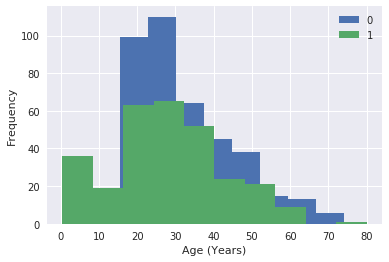

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
survivors.plot(kind='hist', legend=True)

From the results it can be concluded that age is not a determining factor for survival as the shape of the histogram is almost the same for both survivors and non survivors with the exception of children. It is interesting to note that all passengers under age 16 (approximately) survived.

### Survival based on Gender

In [6]:
survivors = titanic_df.groupby('survived')['sex']
survivors.describe()

,count,unique,top,freq
survived,,,,
0,549,2,male,468
1,342,2,female,233


From the table, it can be concluded that more males survived than females. But this is not a determining factor as there was more males aboard than females.

### Survival based on Class

In [7]:
survivors = titanic_df.groupby('survived')['class']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


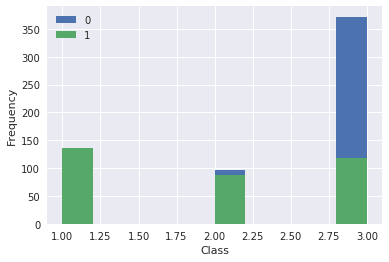

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

survivors.plot(kind='hist', legend=True)
plt.xlabel('Class')

From the results, it can be concluded that first and second class passengers had higher chances of survival than third class passengers.